In [1]:
"""
function used for linear regression is
y = mx + c
c -  bias
m - weight
x - input vector
y - output vector
the loss function is Mean Squared Error
MSE = (1/m) * Σ (y_i - ŷ_i)²
    where:
        - y_true (array-like): The actual output values.
        - y_pred (array-like): The predicted output values.
        - m: Number of data points.
"""

'\nfunction used for linear regression is\ny = mx + c\nc -  bias\nm - weight\nx - input vector\ny - output vector\nthe loss function is Mean Squared Error\nMSE = (1/m) * Σ (y_i - ŷ_i)²\n    where:\n        - y_true (array-like): The actual output values.\n        - y_pred (array-like): The predicted output values.\n        - m: Number of data points.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X = 2 * np.random.random((100, 1))
true_slope = 5
true_intercept = 7
y = true_slope * X + true_intercept + np.random.randn(100, 1)*0.5

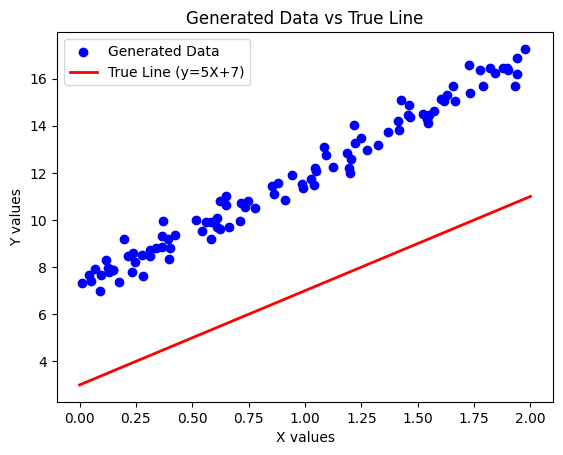

In [10]:
# Plot the actual data points
plt.scatter(X, y, color='blue', label='Generated Data')

# Plot the true line (without noise)
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line = 4 * X_line + 3  # True line equation

plt.plot(X_line, y_line, color='red', linewidth=2, label="True Line (y=5X+7)")

# Labels
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Generated Data vs True Line")
plt.legend()
plt.show()

In [5]:
m = np.random.randn(1,1)
b = np.random.randn(1,1)

In [6]:
def loss_function(X, y, m, b):
    N = len(y)
    y_pred = X.dot(m) + b
    loss = (1/N) * np.sum((y_pred - y) ** 2)
    return loss

In [7]:
def gradient_function(X, y, m, b, learning_rate, epochs=1000):
    N = len(y)
    for i in range(epochs):
        y_pred = X.dot(m) + b
        dm = (-2/N)*np.sum(X*(y-y_pred))
        db = (-2/N)*np.sum(y-y_pred)
        m -= learning_rate * dm
        b -= learning_rate * db
        if i%100==0:
            loss = loss_function(X, y, m, b)
            print(f"epoch: {i}, loss: {loss}")
    return m, b


In [8]:
learning_rate = 0.01
epochs = 1000
m_final, b_final = gradient_function(X, y, m, b, learning_rate, epochs)
print(f"final m: {m_final}, final b: {b_final}")

epoch: 0, loss: 104.150997288203
epoch: 100, loss: 0.31191476305035165
epoch: 200, loss: 0.24610521907466537
epoch: 300, loss: 0.22416733675979028
epoch: 400, loss: 0.21305573375729528
epoch: 500, loss: 0.20742642080203266
epoch: 600, loss: 0.20457452199293402
epoch: 700, loss: 0.20312970503528657
epoch: 800, loss: 0.202397737956214
epoch: 900, loss: 0.2020269118788967
final m: [[4.90744727]], final b: [[7.08218913]]


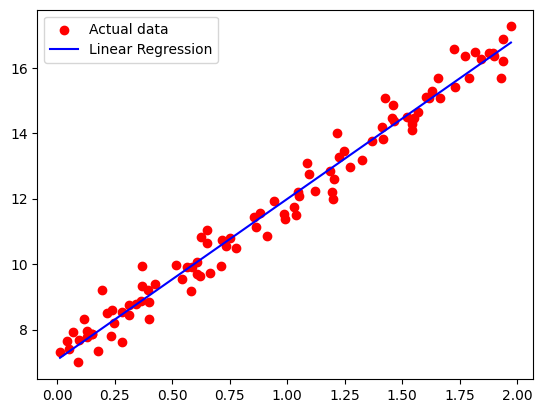

In [9]:
plt.scatter(X, y, color='red', label='Actual data')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = X_line.dot(m_final) + b_final
plt.plot(X_line, y_line, color='blue', label='Linear Regression')
plt.legend()
plt.show()